In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coffee_production = pd.read_csv("total-production.csv").T

coffee_production.columns= coffee_production.iloc[0]

coffee_production.drop("total_production", inplace=True)

# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

In [3]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [4]:
axes_settings = {
    "spines.top": False,
    "spines.right": False,
    #"facecolor": (0, 0, 0, .1),
    #"facealpha":.4,
    #"grid": True, 
    #"grid.axis": 'y'   
}

plt.rc("axes", **axes_settings)
plt.rcParams['font.family'] = 'Kristen ITC'

### Data Prep

In [5]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )


brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [6]:
coffee_production_top5_2018 = coffee_production.loc['2018'].sort_values(ascending=False).iloc[:5]
coffee_production_top5_2018['Rest of World'] = coffee_production.loc['2018'].sort_values(ascending=False).iloc[5:].sum()
pd.DataFrame(coffee_production_top5_2018)

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
Rest of World,45786.0003


### Meshgrid Layout

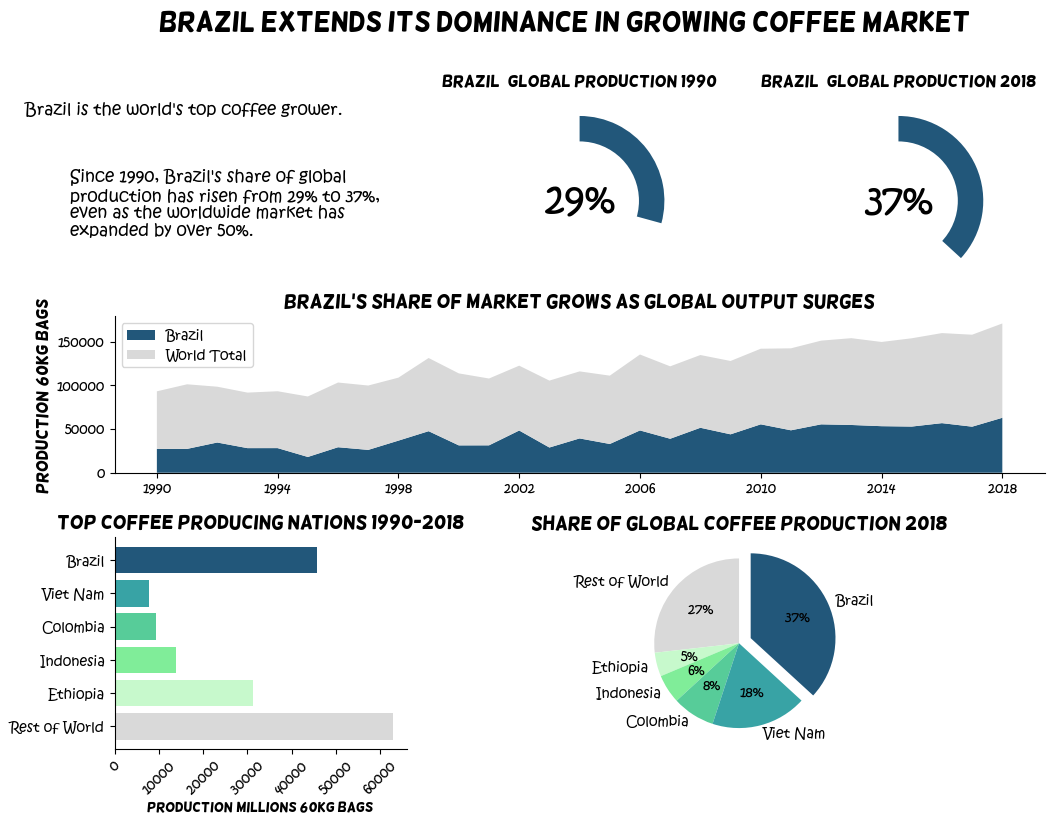

In [7]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 8.5))

gs = gridspec.GridSpec(12, 6, figure=fig)
#gs.update(hspace=.5)


fig.suptitle('Brazil Extends its Dominance in Growing Coffee Market',
             fontsize=20,
             fontweight='bold',
             fontfamily='Helsinki'
            )
fig.text(.05, .695,
         '''Brazil is the world's top coffee grower.



         Since 1990, Brazil's share of global 
         production has risen from 29% to 37%,
         even as the worldwide market has
         expanded by over 50%.
         '''

         , fontsize=12, fontweight='light')

ax1 = fig.add_subplot(gs[0:4, 2:4])

ax1.pie(
    brazil_vs_others.loc['1990'][::-1],
    startangle=90,
    labels = ['',''],
#    autopct= '%.0f%%',
    colors = ['white', '#22577a']
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['1990', 'Brazil']/brazil_vs_others.loc['1990'].sum()*100))}%",
    ha='center',
    va='center',
    fontsize=28,
#    fontfamily='Helsinki'
)
ax1.set_title("Brazil % Global Production 1990", fontsize=12, fontfamily='Helsinki')


ax2 = fig.add_subplot(gs[0:4, 4:])
ax2.pie(
    brazil_vs_others.loc['2018'][::-1],
    startangle=90,
    labels = ['',''],
#    autopct= '%.0f%%',
    colors = ['white', '#22577a']
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%",
    ha ='center',
    va='center',
    fontsize=28,
#    fontfamily='Helsinki'
)

ax2.set_title("Brazil % Global Production 2018", fontsize=12, fontfamily='Helsinki')


    
#Stacked Chart

ax3 = fig.add_subplot(gs[4:7, :])

brazil_vs_others = brazil_vs_others.apply(pd.to_numeric, errors='coerce')

colors3 = ['#22577a', '#d9d9d9']

ax3.stackplot(
    brazil_vs_others.index, 
    brazil_vs_others['Brazil'],
    brazil_vs_others['rest_of_world'],
    labels=['Brazil', 'World Total'],
    colors = colors3
)

ax3.set_title("Brazil's Share of Market Grows as Global Output Surges", fontsize=14, fontfamily='Helsinki')
ax3.set_ylabel('Production (60kg Bags)', fontsize=12, fontfamily='Helsinki')
ax3.set_xticks(brazil_vs_others.index[::4])

ax3.legend(loc='upper left')

#Bar Chart

colors4 = ['#22577a', '#38a3a5', '#57cc99', '#80ed99', '#c7f9cc', '#d9d9d9']
ax4= fig.add_subplot(gs[8:, 0:2])

ax4.barh(
    y=coffee_production_top5_2018.index[::-1],
    width=coffee_production_top5_2018,
    color=colors4[::-1]
)

positions = list(range(len(coffee_production_top5_2018.index)))
labels = coffee_production_top5_2018.index.tolist()[::-1]

ax4.set_title('Top Coffee Producing NAtions 1990-2018', fontsize=14, fontfamily='Helsinki')
ax4.set_xlabel('Production (Millions 60kg Bags)', fontsize=10, fontfamily='Helsinki')
ax4.set_yticks(positions)
ax4.set_yticklabels(labels)
plt.xticks(rotation=45)

#Pie Chart

ax5 = fig.add_subplot(gs[8:, 2:])

ax5.pie(coffee_production_top5_2018[::-1],
        autopct='%.0f%%',
        labels=list(coffee_production_top5_2018.index[::-1]),
        startangle=90,
        colors = colors4[::-1],
        explode=(0, 0, 0, 0, 0, .15),       
       )
ax5.set_title('Share of Global Coffee Production 2018', fontsize=14, fontfamily='Helsinki')

fig.savefig('brazil_stats.png', bbox_inches='tight', facecolor='white')

In [8]:
prices_paid_to_growers = pd.read_csv("prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

In [9]:
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


(array([5., 4., 3., 4., 4., 6., 0., 2., 0., 1.]),
 array([0.63767231, 0.9229374 , 1.2082025 , 1.4934676 , 1.7787327 ,
        2.06399779, 2.34926289, 2.63452799, 2.91979308, 3.20505818,
        3.49032328]),
 <BarContainer object of 10 artists>)

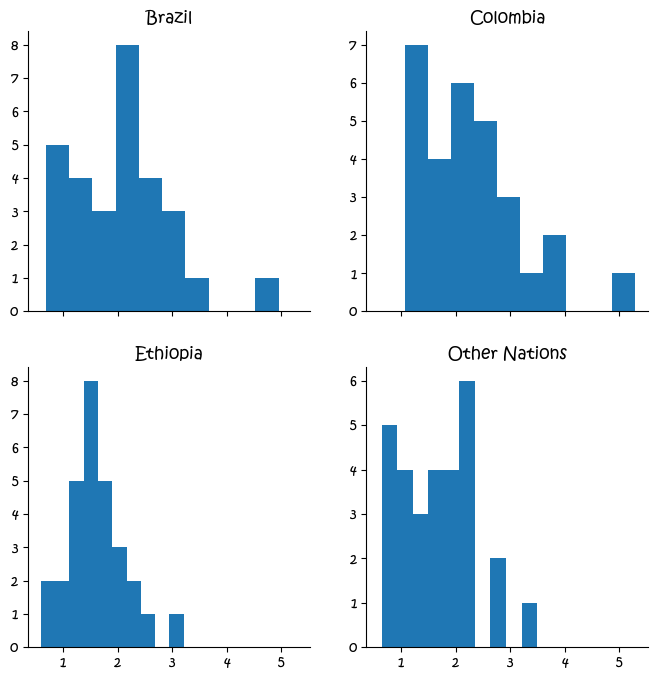

In [10]:
fig, ax = plt.subplots(2, 2, sharex='all', figsize=(8, 8))

ax[0][0].set_title('Brazil')
ax[0][0].hist(prices_paid_to_growers['Brazil'])

ax[0][1].set_title('Colombia')
ax[0][1].hist(prices_paid_to_growers['Colombia'])

ax[1][0].set_title('Ethiopia')
ax[1][0].hist(prices_paid_to_growers['Ethiopia'])

ax[1][1].set_title('Other Nations')
ax[1][1].hist(prices_paid_to_growers['Other Nations'])
